In [1]:
import pandas as pd

from matcha import psm, check_balance

In [2]:
df = pd.read_pickle('deception_df.pkl')

df.loc[df['receiver_labels'] == 'NOANNOTATION', 'receiver_labels'] = None
df.dropna(axis=0, subset=['receiver_labels'], inplace=True)
df['receiver_labels'] = df['receiver_labels'].astype(bool)

df["years"] = df["years"].astype(int)
df["game_score"] = df["game_score"].astype(int)
df["game_score_delta"] = df["game_score_delta"].astype(int)

In [3]:
confounder_cols = ['game_score', 'game_score_delta', 'years']
treatment_mask_q2 = ~df['sender_labels']
control_mask_q2 = ~df['receiver_labels']

matches_q2 = psm(df, {"treat": treatment_mask_q2, "control": control_mask_q2}, confounder_cols, max_caliper=0.001)

  0%|          | 0/2206 [00:00<?, ?it/s]D:\matcha\matcha.py:71: RuntimeWarning: invalid value encountered in less
  return (pair_propensity_differences < max_caliper).all()
  5%|▌         | 113/2206 [02:58<54:56,  1.58s/it] 


KeyboardInterrupt: 

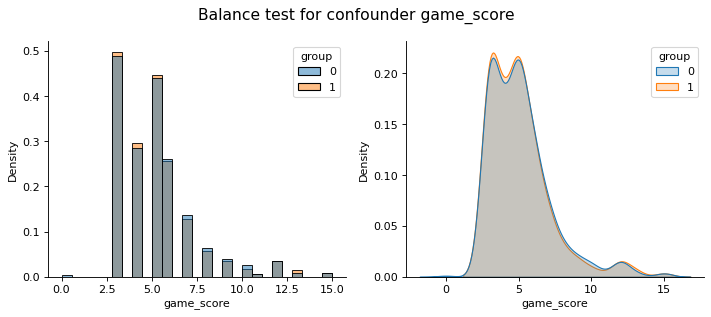

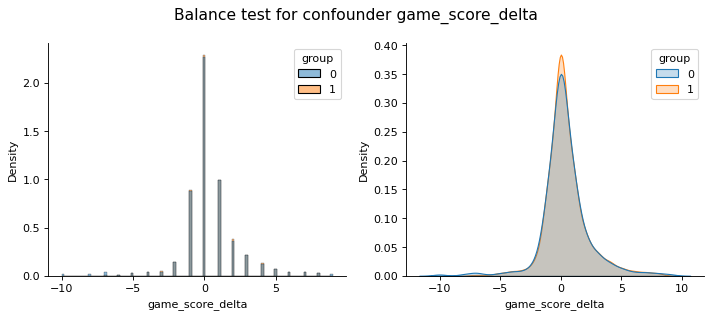

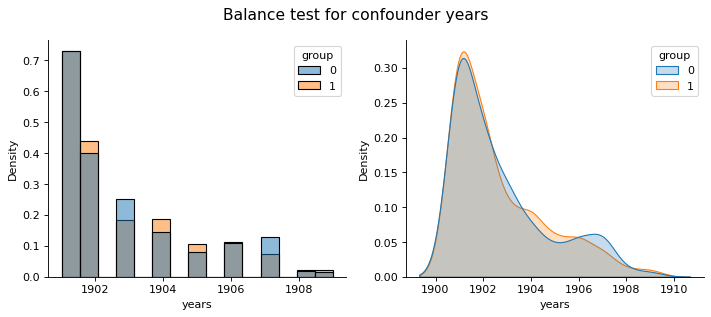

In [4]:
check_balance(df, matches_q2, confounder_cols)